All contours: 1882
Contours with children: 63


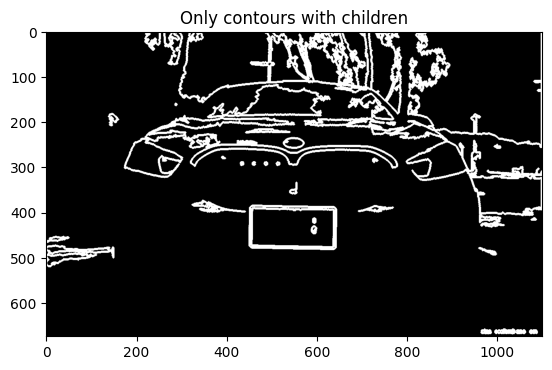

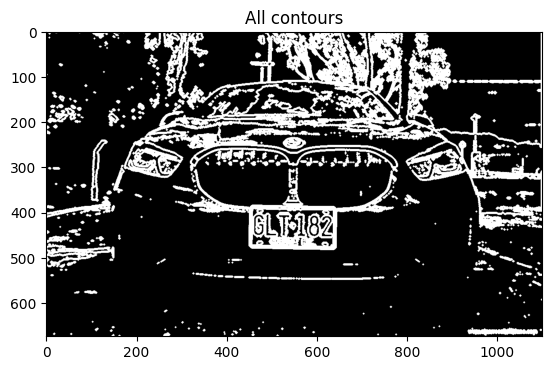

In [1]:
import numpy as np
import cv2 #This is openCV
import matplotlib.pyplot as plt 
    
#Upload images and save it in gray scale
plate1 = cv2.imread('Fig/Placa2.jpg', cv2.IMREAD_COLOR)
plate1 = cv2.cvtColor(plate1, cv2.COLOR_BGR2GRAY)

plate1_thr = cv2.threshold(plate1,150,255, cv2.THRESH_BINARY)[1]
plate1_thr_inv = cv2.threshold(plate1,150,255, cv2.THRESH_BINARY_INV)[1]

contours, hierarchy = cv2.findContours(plate1_thr, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

c_with_children = []
for i in range(len(contours)):
    if hierarchy[0][i][2] != -1:
        c_with_children.append(contours[i])
        
print(f"All contours: {len(contours)}")        
print(f"Contours with children: {len(c_with_children)}")


plate_black1 = plate1_thr * plate1_thr_inv

cv2.drawContours(plate_black1, c_with_children, -1, (255,255,255), 3)
plt.title("Only contours with children")
plt.imshow(plate_black1, cmap="gray")
plt.show()

plate_black = plate1_thr * plate1_thr_inv

cv2.drawContours(plate_black, contours, -1, (255,255,255), 3)
plt.title("All contours")
plt.imshow(plate_black, cmap="gray")
plt.show()

        